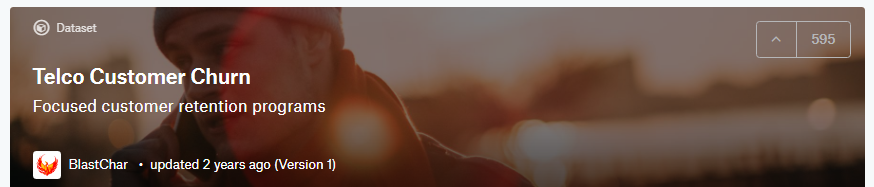

## Context
Deeper Study of Tenure Behavior

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Reading
telco = pd.read_csv('../02 - Git_Ignore/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Cleaning

In [3]:
#Checking nunique values
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
#Checking for spaces in object columns (only objetc can have spaces)
for i in telco.select_dtypes(include='object').columns:
    print(telco[i].str.isspace().value_counts())

False    7043
Name: customerID, dtype: int64
False    7043
Name: gender, dtype: int64
False    7043
Name: Partner, dtype: int64
False    7043
Name: Dependents, dtype: int64
False    7043
Name: PhoneService, dtype: int64
False    7043
Name: MultipleLines, dtype: int64
False    7043
Name: InternetService, dtype: int64
False    7043
Name: OnlineSecurity, dtype: int64
False    7043
Name: OnlineBackup, dtype: int64
False    7043
Name: DeviceProtection, dtype: int64
False    7043
Name: TechSupport, dtype: int64
False    7043
Name: StreamingTV, dtype: int64
False    7043
Name: StreamingMovies, dtype: int64
False    7043
Name: Contract, dtype: int64
False    7043
Name: PaperlessBilling, dtype: int64
False    7043
Name: PaymentMethod, dtype: int64
False    7032
True       11
Name: TotalCharges, dtype: int64
False    7043
Name: Churn, dtype: int64


Only 'TotalCharges' as spaces. 

In [5]:
#Replacing eleven spaces with NAN
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
print(telco.isnull().values.any())
print(telco.shape)

True
(7043, 21)


In [6]:
#Dropind nan rowns
telco.dropna(inplace=True)
print(telco.shape)

(7032, 21)


In [7]:
#Rechecking Total Charges
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

TotalCharges is now type float, floats can't have spaces, so theres no spaces any more. 

In [8]:
#CustomerID will not affect our analyze, droping this column
telco.drop('customerID',axis=1,inplace=True)

# Exploratory analysis of Ternure

In [16]:
#Studing ternure 
telco.tenure.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [17]:
telco.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

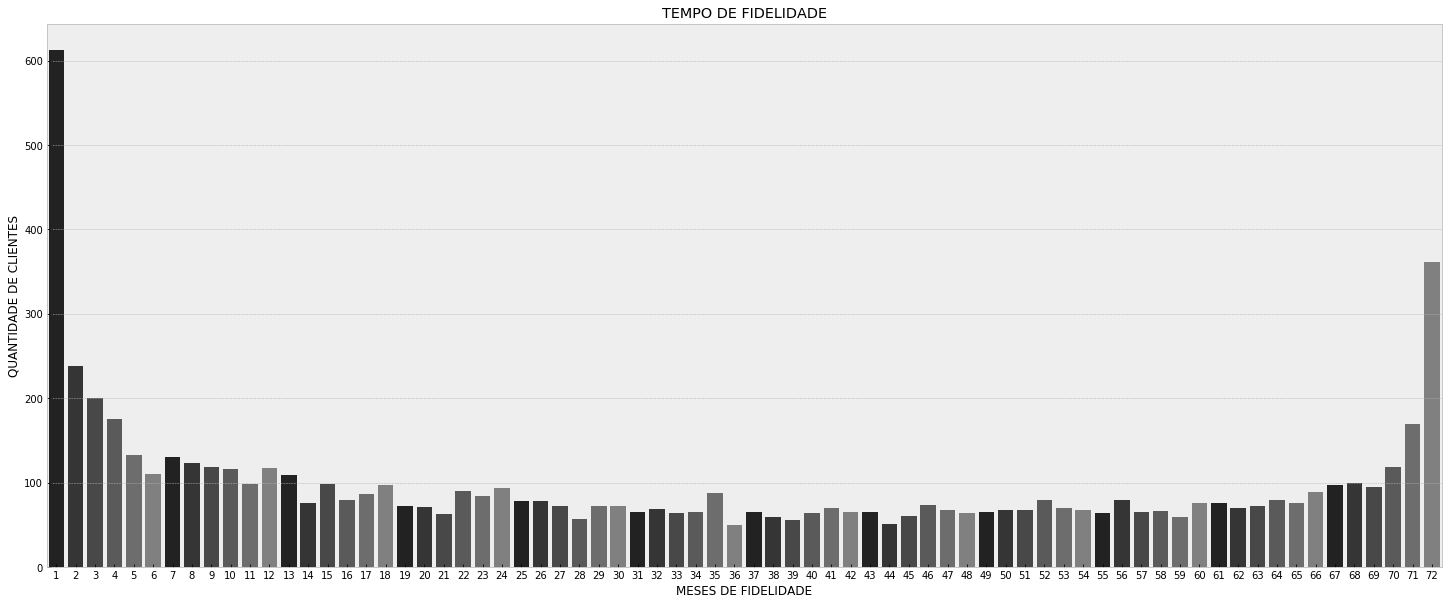

In [19]:
#Number of months the customer has stayed with the company

#plt.style.use('grayscale')
#sns.light_palette("navy", reverse=True)
#plt.style.use('seaborn-dark')
plt.style.use('bmh')

plt.figure(figsize=(25,10))
sns.countplot(telco['tenure'],palette=sns.dark_palette("gray"))
plt.title('TEMPO DE FIDELIDADE')
plt.xlabel('MESES DE FIDELIDADE')
plt.ylabel('QUANTIDADE DE CLIENTES');

In [20]:
telco.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


### Analyzing tenure discrepancy(months that the customer stayed in the company)

In [21]:
telco.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [22]:
#Checking top 5 cases
top5_casos_tenure = telco['tenure'].value_counts(sort=True).head()

In [23]:
#Average customers Vs Time as customer
telco.tenure.value_counts(sort=True).mean()

97.66666666666667

In [24]:
#Average customers VS time as a customer without month 1 and month 72
media_tenure_menos_1_72 = telco[(telco['tenure'] != 1) & (telco['tenure'] != 72)].tenure.value_counts(sort=True).mean()


In [46]:
#Figure out above-average value of customers per month
((top5_casos_tenure*100) / (media_tenure_menos_1_72)).round(decimals=1)



1     708.4
72    418.4
2     275.1
3     231.1
4     203.4
Name: tenure, dtype: float64

####  One month tenure is 400% above average, while for 72 months is 700% above average, why?

#### Let's go deeper

In [47]:
#Data Frame sem tenure 1 e 72
telco_tenure_1 = telco[(telco['tenure'] == 1) ]
telco_tenure_1.shape

(613, 20)

In [48]:
telco_tenure_72 = telco[(telco['tenure'] == 72)]
telco_tenure_72.shape

(362, 20)

In [49]:
telco_others = telco[(telco['tenure'] != 1)  & (telco['tenure'] != 72)]
telco_others.shape

(6057, 20)

In [50]:
#Investigando Tenure em relação ao Senior Citizen
senior_1 = telco_tenure_1.SeniorCitizen.value_counts(normalize=True).round(decimals=2).to_frame()
#type(senior_1)
senior_1

,SeniorCitizen
0,0.86
1,0.14


In [51]:
senior_72 = telco_tenure_72.SeniorCitizen.value_counts(normalize=True).round(decimals=2).to_frame()
#type(senior_72)

In [52]:
senior_others = telco_others.SeniorCitizen.value_counts(normalize=True).round(decimals=2).to_frame()
#type(senior_others)

#### Generating a unique DataFram comparing Seniority Vs group 1 month,72 months and others

In [53]:
teste = pd.concat([senior_1,senior_72,senior_others], axis=1)
teste.columns = [1, 72, 'Others']
teste.index = ['Not Senior', 'Senior']
teste
#pd.concat([senior_1,senior_72,senior_others]).T

,1,72,Others
Not Senior,0.86,0.85,0.83
Senior,0.14,0.15,0.17


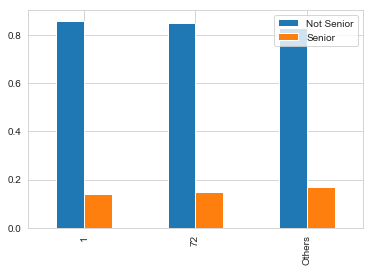

In [54]:
teste.T.plot(kind='bar');

##### Now comparing all categorical columns Vs group 1 month,72 months and others¶

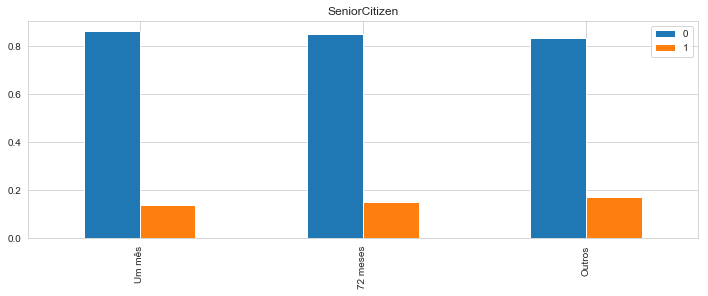

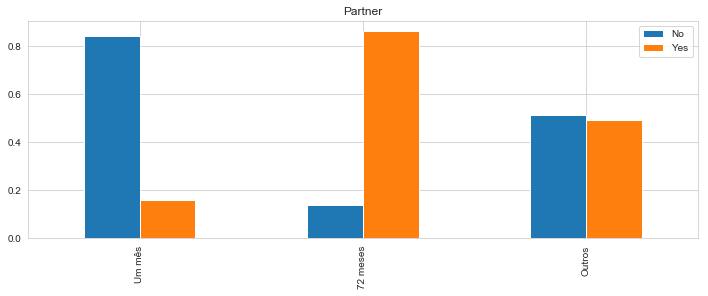

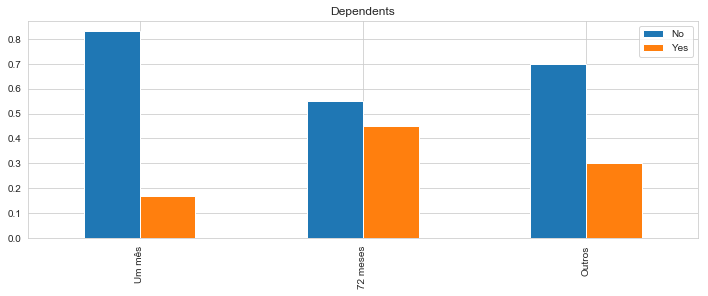

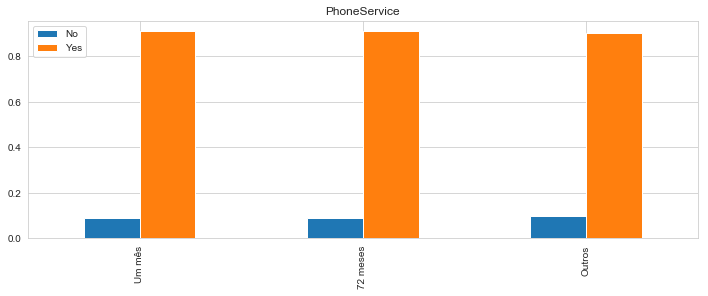

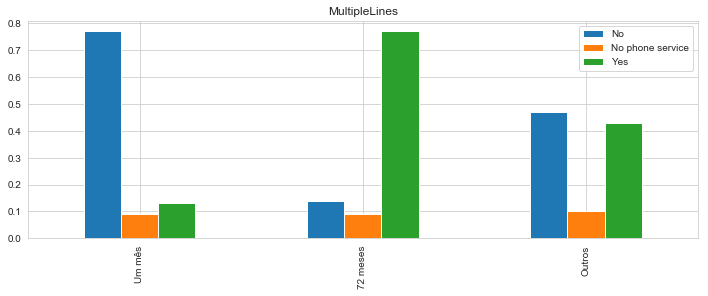

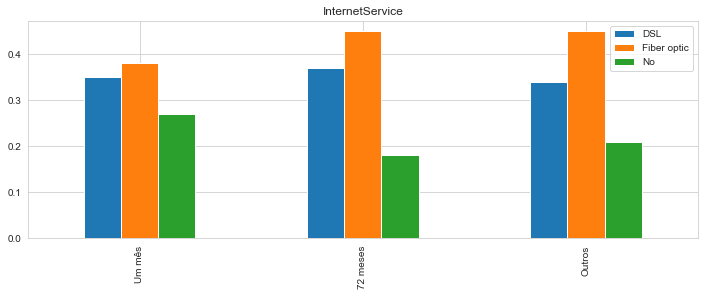

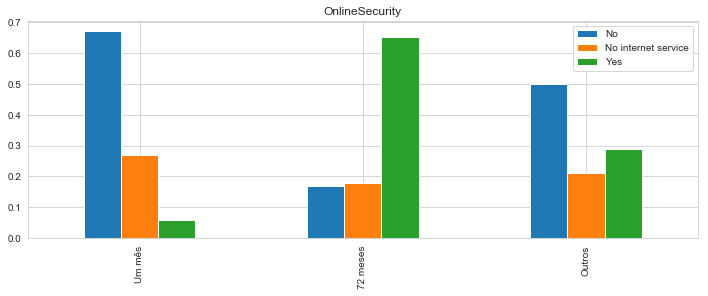

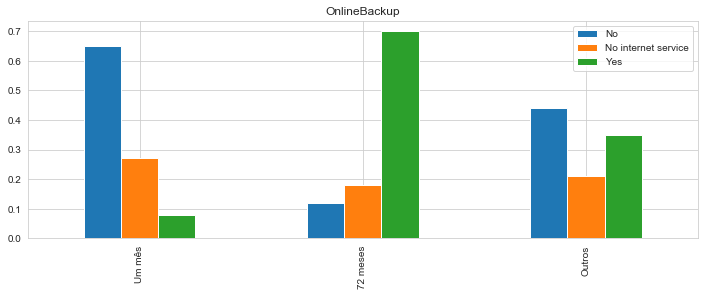

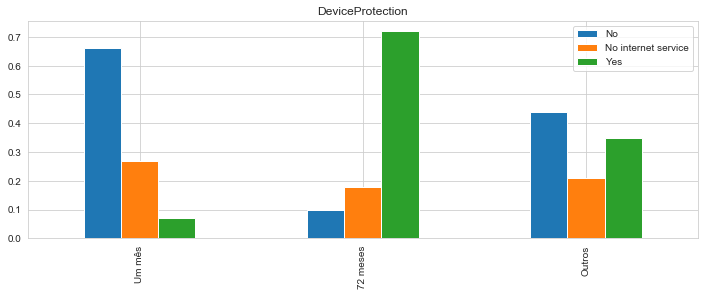

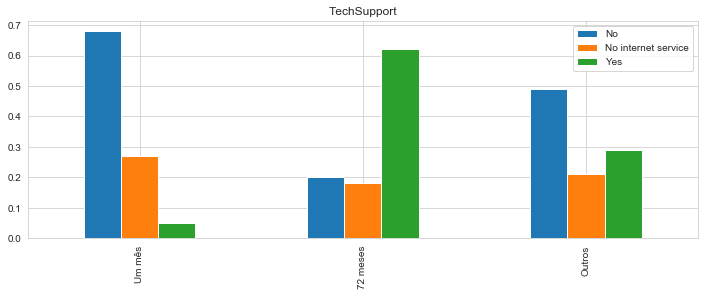

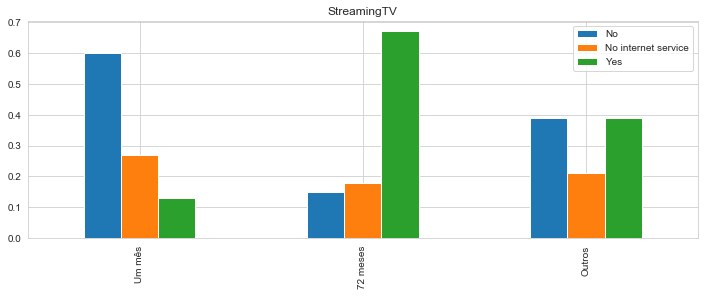

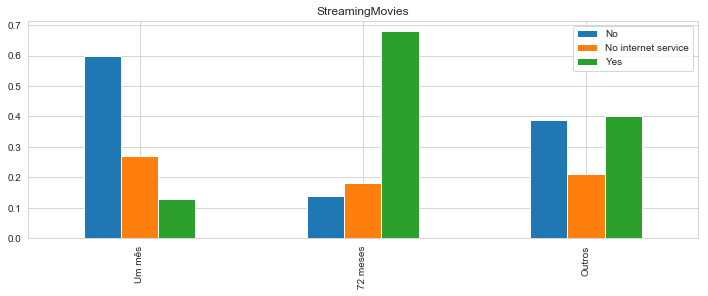

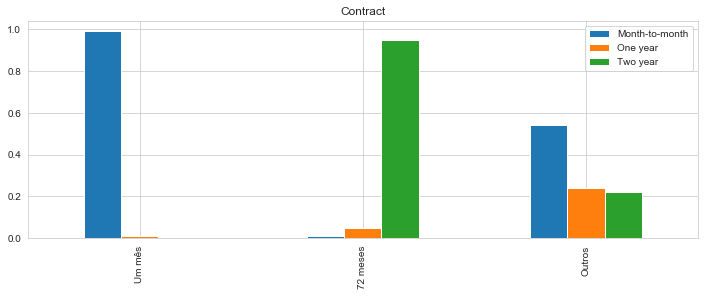

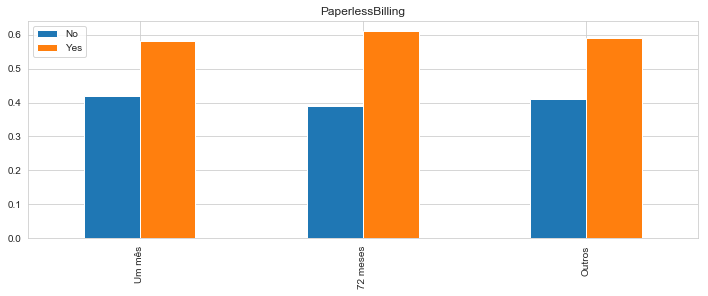

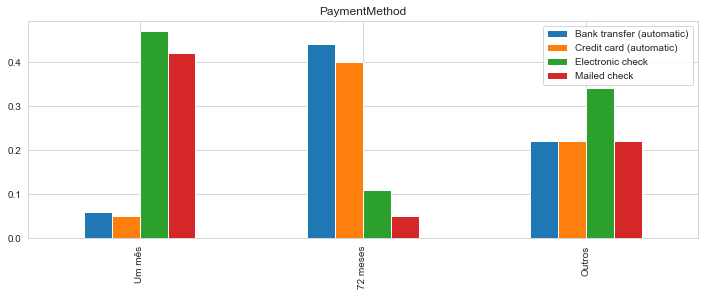

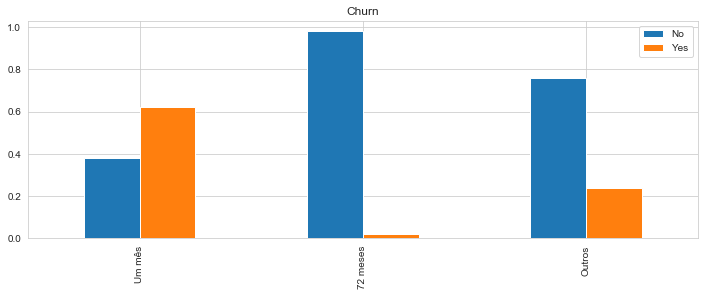

In [55]:
for i in ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod','Churn']:
        #plt.style.use('seaborn-dark-palette')
        rate_tenure_1 = telco_tenure_1[i].value_counts(normalize=True).round(decimals=2).to_frame()
        rate_tenure_72 = telco_tenure_72[i].value_counts(normalize=True).round(decimals=2).to_frame()
        rate_tenure_others = telco_others[i].value_counts(normalize=True).round(decimals=2).to_frame()
        rate_plot = pd.concat([rate_tenure_1,rate_tenure_72,rate_tenure_others], axis=1,sort=True)
        rate_plot.columns = ['Um mês','72 meses', 'Outros']
        rate_plot.T.plot(kind='bar',figsize=(12,4));
        plt.title(i)
#         print(rate_tenure_1)
#         print(rate_tenure_72)
#         print(rate_tenure_others)

With these graphs in hand we can create three types of personas for each group.

##### Persona - one month tenure group

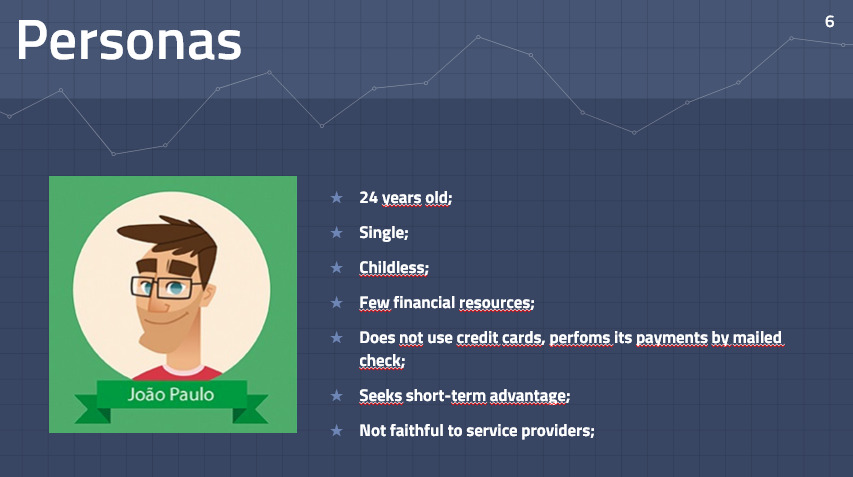

##### Persona - Others group (every one, less for one month and 72 month periods)

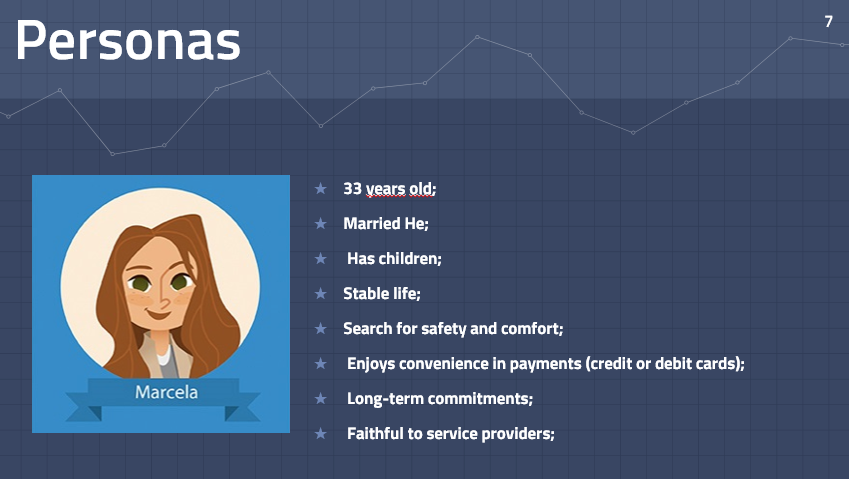

##### Persona - 72 month tenure group

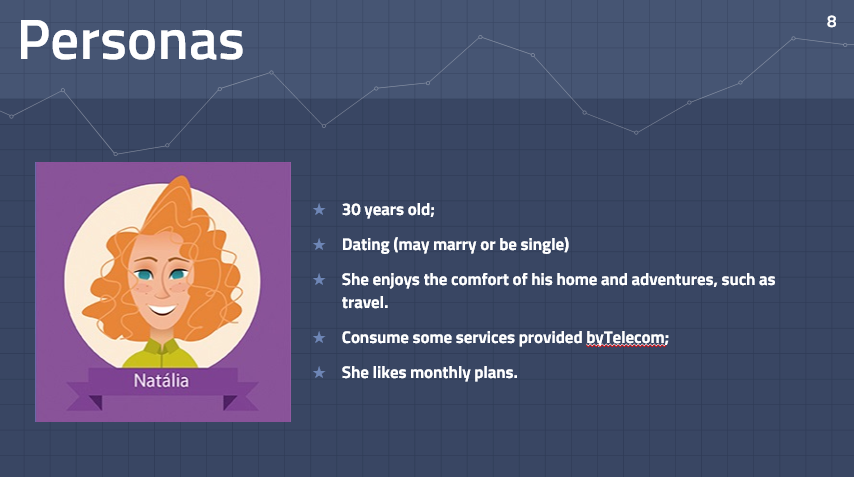

#### The end =)